<a href="https://colab.research.google.com/github/yairrinat/Survey_Analysis/blob/main/survey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this short script I plan to analyze the survey data we got from the WMO

# **This is a new version**


In [2]:
# load and install pakages
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading excels:

In [3]:
# link to excel file:
url_world = "https://github.com/yairrinat/Survey_Analysis/blob/main/WMO_SURVEY.xlsx?raw=true"
url_pop = "https://github.com/yairrinat/Survey_Analysis/blob/main/world_pop_all.xlsx?raw=true"
url_country_area = "https://github.com/yairrinat/Survey_Analysis/blob/main/country_area_new.xlsx?raw=true"
url_staff_reduced = "https://github.com/yairrinat/Survey_Analysis/blob/main/WMO%20Hydrology%20Survey_Staff_reduced.xlsx?raw=true"
url_GDP = "https://github.com/yairrinat/Survey_Analysis/blob/main/GDP_PPP.xlsx?raw=true"
url_budget = "https://github.com/yairrinat/Survey_Analysis/blob/main/budget.xlsx?raw=true"

#load personal data:
df_personal = pd.read_excel(url_world,index_col = 0,header = 0, sheet_name = "Person details")
df_personal = df_personal.iloc[1:,:] # remove first row
#print(df_personal)

#load staff data:
df_staff = pd.read_excel(url_world,index_col=0,header = 0, sheet_name = "STAFF")
list_ind = df_staff.index.to_list()
list_ind[0] = "secondary_title"
df_staff.index= list_ind
df_staff.head(10)

#load reduced staff data
df_staff_reduced = pd.read_excel(url_staff_reduced,index_col=0,header = 0, sheet_name = "STAFF")
list_ind = df_staff_reduced.index.to_list()
list_ind[0] = "secondary_title"
df_staff_reduced.index= list_ind
df_staff_reduced.head(10)

#load budget:
df_budget = pd.read_excel(url_budget,index_col=0,header = 0)
df_budget.dropna(inplace=True)
df_budget.sort_values(by  = "Total million nis", inplace=True)
df_budget.head()

#load population data:
df_pop = pd.read_excel(url_pop)
# select only the population density and YEAR 2020:
df_pop = df_pop[df_pop['Year'] == 2019]
df_pop = df_pop[df_pop['Series'] == "Population density"]
df_pop.drop(["Region/Country/Area","Footnotes","Source", "Series", "Year"],axis = 1, inplace = True)
df_pop.rename(columns={"Population, density and surface area"	: "Country", "Value" : "pop_density_2019"}, inplace = True)
df_pop.set_index("Country",inplace = True)

#load GNI = gross national income previously gross national product
df_gpd_ppp = pd.read_excel(url_GDP,index_col = 0, header = 3)
df_gpd_ppp = df_gpd_ppp["2019"] # in $ 

df = pd.concat([df_staff,df_pop])


df

,Please provide the total number of staff in your institution/organization by gender:,Unnamed: 2,"Please provide the number of staff working in the institution/organization, in the following areas along with their gender distribution: (Female/Male)",Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,"Please provide the number of staff in your institution/organization with a university degree, along with their gender distribution:",Unnamed: 9,Please provide the number of staff in your institution/organization by the following age categories:,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Please indicate the trend of the staffing figures during the recent 3-5 years:,Unnamed: 16,pop_density_2019
secondary_title,Female:,Male:,Management:,Hydrological Modeling and Forecasting:,Information and Communication Technology:,Technician:,"Support (administration, security, general sup...",Female:,Male:,Less than 20 years:,21-30 years:,31-40 years:,41-50 years:,Over 51 years:,Response,Other (please specify),NaN
Albania,15,25,6,8,2,6,4,15,20,0,5,5,20,15,Steadily decreasing,NaN,NaN
Argentina,95,146,40 / 26,38 / 61,0 / 0,13 / 40,4 / 19,50,73,0,5,45,45,146,No significant year-to-year change,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,525,1083,NaN,47 flood forecasting,NaN,NaN,NaN,NaN,NaN,0,1,14,16,16,No significant year-to-year change,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.6571
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1897
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.2341
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0265


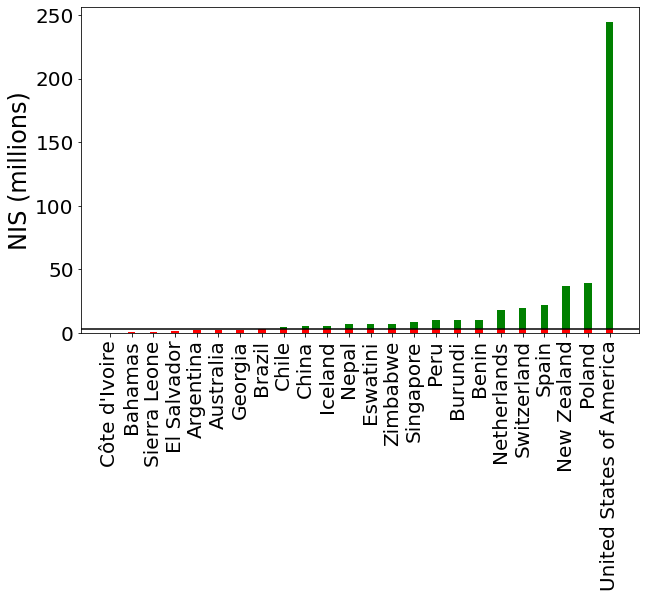

In [30]:
aa = df_staff_reduced.iloc[1:,3]

print(aa.head())

def identity_total_personal(x_in):
  """ This funciton identify the numbers in each cell of an input dataframe,
   turns them to integers and returns their sum"""
  try:
    if type(x_in) == int or type(x_in) == float:
      return x_in
    list_nums = re.findall(r"\d+",x_in)
    list_nums2 = [int(x) for x in list_nums]
    return sum(list_nums2)
  except:
    return float("NAN")
# return re.findall(r"\d+",df)

# sum the numbers in each cell:
#if aa will be a df then I should change the map to applymap !!
new = aa.map(identity_total_personal)
print(new.head())
# drop nans:
new.dropna(inplace = True)

print(new.head())
# now for the plotting:
new = new[new!=0]
new = new.sort_values()
new_array = np.array(new)
new_country = np.array(new.index)
#----------------------------------------------------
threshold = 4    # 4 modelers and forecasters

# split it up
above_threshold = np.maximum(new_array - threshold, 0)
below_threshold = np.minimum(new_array, threshold)

# and plot it
fig, ax = plt.subplots(figsize = (10,6))
#plt.figure(figsize=(20, 3))  # width:10, height:8
ax.bar(new_country, below_threshold, 0.35, color="r")
ax.bar(new_country, above_threshold, 0.35, color="g",bottom=below_threshold)

yt = ax.get_yticks() 
yt=np.append(yt,4)
ytl=yt.tolist()
ytl[-1]="4 Modelers + forecasters"
#ax.set_yticks(yt)
#ax.set_yticklabels(ytl)

plt.axhline(threshold, color = 'k')
plt.yticks(fontsize = 20)
plt.xticks(rotation = 90, fontsize = 20)
plt.ylabel('Number of people',fontsize = 24)
plt.title("Number of flood modelers and foreasters", fontsize = 16)

 # Adding annotation on the plot.
#ax.annotate('2 forecaster + 2 modelers suggested by us', xy=(16, 9), xytext=(1, 50), fontsize=15,
#            arrowprops=dict(facecolor='green', shrink=0.05))
plt.show()
#ax.plot(figsize=(60, 10))
fig.savefig("look-ma_a-threshold-plot.pdf",bbox_inches = "tight")
#----------------------------------------------------

# plot Budget:
df_budget=df_budget.iloc[:,0]
new_array = np.array(df_budget)
new_country = np.array(df_budget.index)
#----------------------------------------------------
threshold = 2.9    # 4 modelers and forecasters

# split it up
above_threshold = np.maximum(new_array - threshold, 0)
below_threshold = np.minimum(new_array, threshold)
# and plot it
fig, ax = plt.subplots(figsize = (10,6))
#plt.figure(figsize=(20, 3))  # width:10, height:8
ax.bar(new_country, below_threshold, 0.35, color="r")
ax.bar(new_country, above_threshold, 0.35, color="g",bottom=below_threshold)
plt.axhline(threshold, color = 'k')
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('NIS (millions)', fontsize = 24)
#plt.title("Annual budget for flood forecasting (without Radar, website, and IT)", fontsize = 16)

# Adding annotation on the plot.
#ax.annotate('Total budget suggested by us', xy=(8, 9), xytext=(1, 50), fontsize=15,
 #           arrowprops=dict(facecolor='green', shrink=0.05))
plt.show()
#ax.plot(figsize=(60, 10))
fig.savefig("Budget.pdf",bbox_inches = "tight")
#----------------------------------------------------

plt.figure(figsize = (10,3))
new.plot(kind = "bar")
plt.axhline(y = 6, color = "k--")


new.plot(kind = "box", ylim =(0,50) )



plt.violinplot(new)

sns.displot(new, kind="hist", binwidth = 5)

# new.head()
# # test:
# a = re.findall(r"\d+","3 jh 32" )
# print(a)
# sum([int(a[0]) , int(a[1])])

# identity_total_personal("aa")


# type(df_staff[1:,3])



In [ ]:
new

Albania                                                   8.0
Argentina                                                99.0
Australia                                                47.0
Bahamas                                                   2.0
Bangladesh                                               14.0
Belarus                                                   5.0
Belgium                                                   1.0
Belize                                                    1.0
Benin                                                    10.0
Bhutan                                                    4.0
Brazil                                                    4.0
Cambodia                                                  8.0
Central African Republic                                  0.0
Chile                                                     3.0
China                                                    18.0
Côte d'Ivoire                                             0.0
Czech Re